<a href="https://www.kaggle.com/code/khaydaraliev97/multi-class-prediction-of-obesity-risk-playground?scriptVersionId=186838315" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

In [3]:
df_train= pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')

In [4]:
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                         ("scaler", StandardScaler())])

cat_pipeline = Pipeline([("cat_encoder", OneHotEncoder())])

target = ['NObeyesdad']
cat_attribs=[ 'Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']
num_attribs=[ 'Height', 'Age','Weight','FCVC','NCP','CH2O','FAF','TUE']

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)])

X = df_train.drop('NObeyesdad',axis=1)
y = df_train['NObeyesdad']

X_transformed = preprocess_pipeline.fit_transform(X[num_attribs + cat_attribs])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.2,random_state=42)

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.90      0.91       524
      Normal_Weight       0.78      0.85      0.81       626
     Obesity_Type_I       0.84      0.84      0.84       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.70      0.69      0.70       484
Overweight_Level_II       0.75      0.69      0.72       514

           accuracy                           0.86      4152
          macro avg       0.85      0.85      0.85      4152
       weighted avg       0.86      0.86      0.86      4152

Model aniqligi: 0.8629576107899807


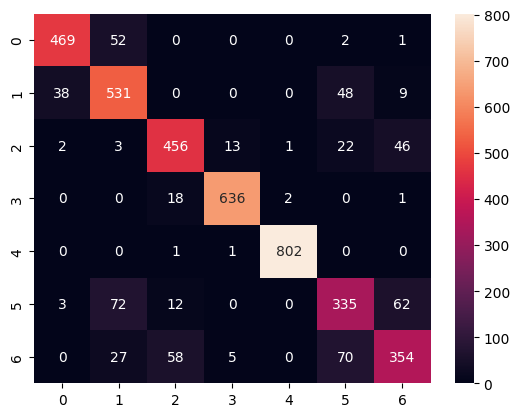

cross validation score 0.8616169048840131


In [6]:
# Train the RF model
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

from sklearn.model_selection import cross_val_score
# Model evaluation using cross-validation
print(f"cross validation score {cross_val_score(RF_model, X_train, y_train, cv=5, scoring='accuracy').mean()}")

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       524
           1       0.87      0.89      0.88       626
           2       0.89      0.87      0.88       543
           3       0.97      0.97      0.97       657
           4       0.99      1.00      1.00       804
           5       0.78      0.78      0.78       484
           6       0.79      0.81      0.80       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

Model aniqligi: 0.9019749518304432


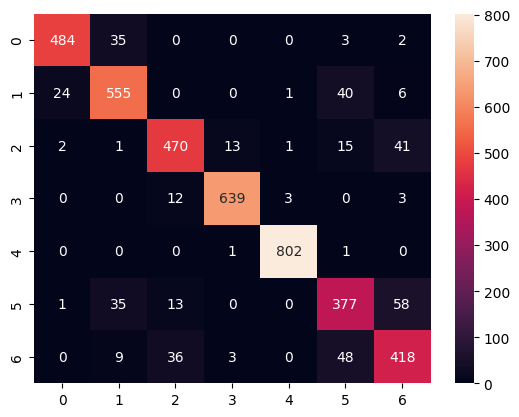

cross validation score 0.9047337823033725


In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder with y_train and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_encoded)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test_encoded, y_pred))
print("Model aniqligi:", accuracy_score(y_test_encoded,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

from sklearn.model_selection import cross_val_score
# Model evaluation using cross-validation
print(f"cross validation score {cross_val_score(xgb_model, X_train, y_train_encoded, cv=5, scoring='accuracy').mean()}")

                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.81      0.80       524
      Normal_Weight       0.60      0.63      0.62       626
     Obesity_Type_I       0.64      0.77      0.70       543
    Obesity_Type_II       0.93      0.94      0.93       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.53      0.43      0.47       484
Overweight_Level_II       0.64      0.53      0.58       514

           accuracy                           0.76      4152
          macro avg       0.73      0.73      0.73      4152
       weighted avg       0.75      0.76      0.75      4152

Model aniqligi: 0.7567437379576107


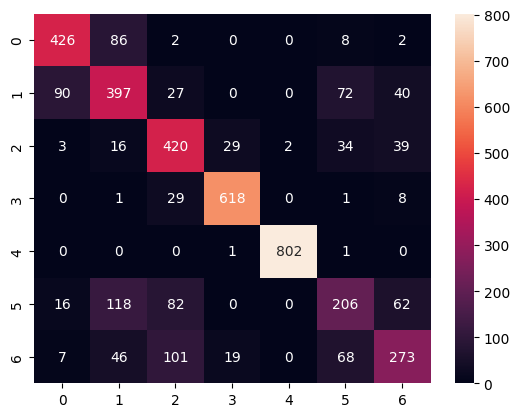

cross validation score 0.754907861072724


In [8]:
# Train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

from sklearn.model_selection import cross_val_score
# Model evaluation using cross-validation
print(f"cross validation score {cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy').mean()}")

In [9]:
df_test.drop(df_test[df_test['CALC']=='Always'].index, inplace=True)

In [10]:
from sklearn.model_selection import GridSearchCV, KFold
X_test_predict = preprocess_pipeline.fit_transform(
    df_test[num_attribs + cat_attribs])
X_test_predict
Y_test_pred = xgb_model.predict(X_test_predict)
Y_test_pred

array([3, 5, 4, ..., 0, 1, 3])

In [11]:
y_result = df_test
y_result['NObeyesdad'] = Y_test_pred
y_result = pd.DataFrame(y_result["NObeyesdad"])

In [12]:
names = {0 : 'Insufficient_Weight',1:'Normal_Weight',2:'Obesity_Type_I',3:'Obesity_Type_II',4:'Obesity_Type_III',5:'Overweight_Level_I',6:'Overweight_Level_II'}

def rows_name(name):
    return names.get(name, name)

# Use the .apply method
y_result['NObeyesdad'] = y_result['NObeyesdad'].apply(rows_name)

In [13]:
y_result

,NObeyesdad
0,Obesity_Type_II
1,Overweight_Level_I
2,Obesity_Type_III
3,Obesity_Type_I
4,Obesity_Type_III
...,...
13835,Overweight_Level_II
13836,Overweight_Level_I
13837,Insufficient_Weight
13838,Normal_Weight


In [14]:
y_result.to_csv('subm.csv')